<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/0031_Cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar - 100 이미지 분류

In [1]:
import numpy as np 
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

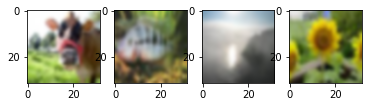

In [4]:
import matplotlib.pyplot as plt

plt.subplot(141)
plt.imshow(X_train[0], interpolation='bicubic')
plt.subplot(142)
plt.imshow(X_train[4], interpolation='bicubic')
plt.subplot(143)
plt.imshow(X_train[8], interpolation='bicubic')
plt.subplot(144)
plt.imshow(X_train[12], interpolation='bicubic')
plt.show()

In [5]:
# X data  : 0~1사이의 실수로 변환. 같은거 같기도?
X_train = X_train.astype('float32') / 255. 
X_test = X_test.astype(np.float32) / 255.

In [6]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((50000, 100), (10000, 100))

- 모델 정의/설정/학습/평가

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [8]:
model = Sequential([ 
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25), 

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')        
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [9]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model_path = 'best_cifar-100.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

- 데이터 부풀리기

In [11]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs = 100, batch_size=32, verbose=2,
    callbacks = [checkpoint, early_stop]
)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 4.08031, saving model to best_cifar-100.h5
1250/1250 - 32s - loss: 4.3624 - accuracy: 0.0387 - val_loss: 4.0803 - val_accuracy: 0.0928 - 32s/epoch - 26ms/step
Epoch 2/100

Epoch 00002: val_loss improved from 4.08031 to 3.69243, saving model to best_cifar-100.h5
1250/1250 - 19s - loss: 3.9542 - accuracy: 0.0957 - val_loss: 3.6924 - val_accuracy: 0.1509 - 19s/epoch - 16ms/step
Epoch 3/100

Epoch 00003: val_loss improved from 3.69243 to 3.50720, saving model to best_cifar-100.h5
1250/1250 - 19s - loss: 3.6960 - accuracy: 0.1374 - val_loss: 3.5072 - val_accuracy: 0.1773 - 19s/epoch - 15ms/step
Epoch 4/100

Epoch 00004: val_loss improved from 3.50720 to 3.36821, saving model to best_cifar-100.h5
1250/1250 - 19s - loss: 3.5166 - accuracy: 0.1653 - val_loss: 3.3682 - val_accuracy: 0.2016 - 19s/epoch - 15ms/step
Epoch 5/100

Epoch 00005: val_loss improved from 3.36821 to 3.21921, saving model to best_cifar-100.h5
1250/1250 - 19s - loss: 3

In [13]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)
# 313/313 [==============================] - 2s 6ms/step - loss: 2.1186 - accuracy: 0.4508
# [2.118633270263672, 0.45080000162124634] 성능이 이게?

313/313 [==============================] - 2s 6ms/step - loss: 2.1186 - accuracy: 0.4508


[2.118633270263672, 0.45080000162124634]

In [14]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

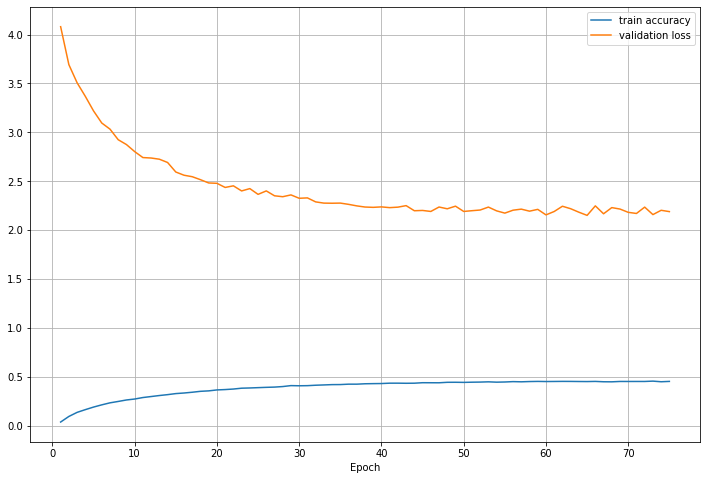

In [15]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()